# **K-Nearest Neighbors**

In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

---

### **1. Generating data**

You will start by generating synthetic data for this problem.  

- Generate a dataset with **n = 50 points** in a unit square. Each point should have an assigned label: orange or blue.  
  - Think about the rules to assign the labels (hint: you need a boundary rule to classify points as orange or blue).  
  - Store the x and y coordinates, along with the label, in a structured format.  
  - Vizualize the dataset.

---

### **2. The algorithm**

You will now use your generated dataset to determine the label of a new observation **(x₀, y₀)**. Here are the steps you should follow :

- Compute the distances between **(x₀, y₀)** and all points in your dataset.  
  - How will you calculate the distance ? 
  - What type of distance metric can you use ?  

- Select a value for **K**

- Identify the **K nearest neighbors** for your new point based on the distances you computed.  

- Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation ? Do it and explain your approach.

- Experiment with different values of **K** :  
  - Analyze how the prediction changes depending on different values for **K**.  
  - What happens when **K** is too small ? Too large ?

---

### **3. More complex dataset**

- Implement the K-Nearest Neighbors algorithm for datasets with more complicated shapes (generate these data, you can use your creativity).  
  - What happens to your prediction as the dataset structure becomes more complex ?

- Test your implementation by generating a random test set with new points. Measure how well your algorithm performs (e.g., accuracy, precision, recall).  

- Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. Which metric feels more appropriate for your specific problem ?

---



In [51]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score , confusion_matrix ,recall_score , precision_score , classification_report
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter


In [ ]:
np.random.seed(42)
n = 50  #
X = np.random.rand(n, 2)  
# Function to assign class labels based on position
def assign_label(x, y):
    return 'orange' if y > x else 'blue'  

# Assign labels to all points
y_labels = np.array([assign_label(x, y) for x, y in X])

In [ ]:
# K-Nearest Neighbors (KNN) prediction function
def knn_predict(X, y_labels, new_point, K=3, metric='euclidean'):
    dist_funcs = {'euclidean': distance.euclidean, 'manhattan': distance.cityblock}
    # Compute distances from new_point to all points in X
    dists = np.array([dist_funcs[metric](new_point, p) for p in X])
    # Get indices of K nearest neighbors
    nearest_indices = np.argsort(dists)[:K]
    # Get the labels of the nearest neighbors
    nearest_labels = y_labels[nearest_indices]
    # Determine the most common label
    predicted_label = Counter(nearest_labels).most_common(1)[0][0]
    # Return predicted label and nearest neighbors
    return predicted_label, X[nearest_indices]

In [ ]:
def plot_data(X, y_labels, new_point=None, neighbors=None):
    colors = {'orange': 'orange', 'blue': 'blue'}
    # Plot all points with their respective labels
    for label in np.unique(y_labels):
        mask = y_labels == label
        plt.scatter(X[mask, 0], X[mask, 1], color=colors[label], label=label)
    # Plot the new point
    if new_point is not None:
        plt.scatter(*new_point, color='red', marker='x', s=100, label='New Point')
    # Connect the new point to its neighbors with dashed lines
    if neighbors is not None:
        for neighbor in neighbors:
            plt.plot([new_point[0], neighbor[0]], [new_point[1], neighbor[1]], 'k--')
    
    plt.legend()
    plt.show()

Predicted label for [0.6 0.3]: blue


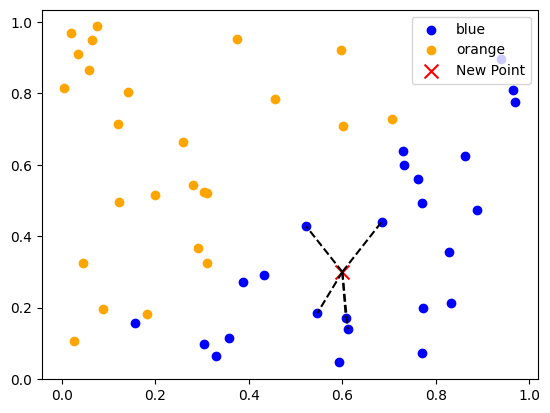

In [ ]:
new_point = np.array([0.6, 0.3])
pred_label, neighbors = knn_predict(X, y_labels, new_point, K=5)
print(f"Predicted label for {new_point}: {pred_label}")
plot_data(X, y_labels, new_point, neighbors)  

In [56]:
for K in [1, 3, 10, 20]:
    pred_label, _ = knn_predict(X, y_labels, new_point, K)
    print(f"K={K}, Predicted label: {pred_label}")


K=1, Predicted label: blue
K=3, Predicted label: blue
K=10, Predicted label: blue
K=20, Predicted label: blue


---
---

# **Support Vector Machine**

A dataset contains two classes: Class A ($y=+1$ ) and Class B ($y=-1$). Your goal is to:

You are given six labeled data points in a 2D space:

| Point $ x_i $     | Label $ y_i $  |
|-------------------|---------------|
| $ x_1 = [2, 3] $   | $ +1 $         |
| $ x_2 = [1, 2] $   | $ +1 $         |
| $ x_3 = [3, 1] $   | $ +1 $         |
| $ x_4 = [1, 0] $   | $ -1 $         |
| $ x_5 = [2, -1] $  | $ -1 $         |
| $ x_6 = [0, 0] $   | $ -1 $         |

---

### **1. Sketch & intuition**
- **1.1:** Plot the six points on a 2D graph with $ x_1 $ -$ x_2 $  axes. Do the two classes form distinct clusters ?
- **1.2:** What does it mean for the two classes to be linearly separable ? What would this imply about the complexity of the classification problem ?
- **1.3:** Are the two classes linearly separable ? If yes, arbitrarily sketch a decision boundary (no need to optimize it yet).
- **1.4:** What is the margin in the context of a decision boundary?
- **1.5:** Why would we like to maximize the margin ? What might happen if the margin is very small ? (think about new observations and future predictions)

---

### **2. Decision Boundary for Hard-Margin**
The decision boundary for an SVM is represented as:

$$
x^T \beta + \beta_0 = 0, \quad \text{where } \beta = [\beta_1, \beta_2]^T \text{are some weights}, \text{ and } \beta_0 \text{ is the intercept.}
$$

- **2.1:** Write down the margin constraints:

$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$

For each observation ($ x_1, x_2, ..., x_6 $ ), substitute $x_i$  and $y_i$  into the inequality.

- **2.2** What does the margin constraint enforce for a correctly classified point ? Explain what this constraint means for points with $y_i=+1$ and $y_i=−1$.

- **2.3** Lets say our solver choose random initial values to specify a decision boundary:
    - $\beta = [1, -1]^T$ 
    - $\beta_0 = 0$

Verify step by step, whether the margin constraint is satisfied for each observation ($x_1, x_2, \ldots, x_6$ ) given their respective labels ($y_1, y_2, \ldots, y_6$ ). Sketch the decision line.

- **2.4** At the second iteration, our solver updates the parameters : $\beta = [2, 2]^T$ & $\beta_0 = -4$. Check again the conditions for each observations and draw the line. Does the margin look to be maximized here ? Compute its lenght :  $$M = \frac{1}{||\beta||}$$,
where $ ||\beta|| = \sqrt{\beta_1^2 + \beta_2^2} $ .



- **2.5: Using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), write a code to find the decision line that maximize the margin. What are the estimated parameters ? Plot the line.**
    (Hint : use the linear kernel parameter)



In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [ ]:
# Create coordinates in 2D space
points = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])  
# Define class labels (1 - blue, -1 - red)
labels = np.array([1, 1, 1, -1, -1, -1])  


In [ ]:
# Create and train an SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1e6) 
svm_model.fit(points, labels)  


SVC(C=1000000.0, kernel='linear')

In [ ]:
# Retrieve parameters of the separating hyperplane
beta_optimal = svm_model.coef_[0]  
beta_0_optimal = svm_model.intercept_[0]  


In [ ]:
# Calculate the margin width
margin_optimal = 1 / np.linalg.norm(beta_optimal)



In [ ]:
# Generate x values for plotting the decision boundary
x_values = np.linspace(-1, 4, 100)
y_values = -(beta_optimal[0] * x_values + beta_0_optimal) / beta_optimal[1]

# Compute margin boundary lines
y_margin_1 = -(beta_optimal[0] * x_values + beta_0_optimal - 1) / beta_optimal[1]
y_margin_2 = -(beta_optimal[0] * x_values + beta_0_optimal + 1) / beta_optimal[1]


In [ ]:
# Retrieve support vectors
support_vectors = svm_model.support_vectors_


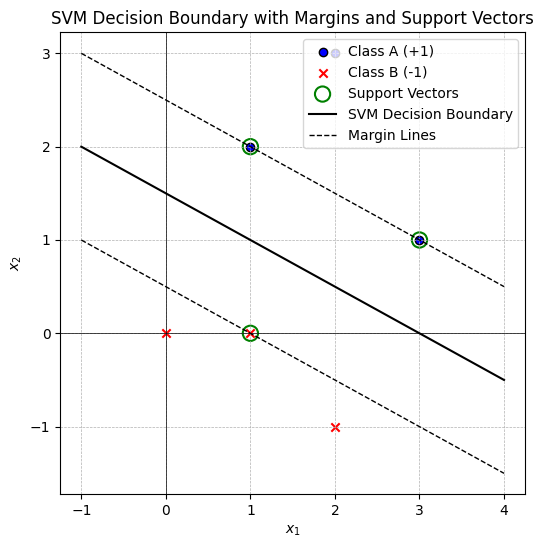

In [ ]:

plt.figure(figsize=(6,6))

# Plot class points
plt.scatter(points[labels == 1][:, 0], points[labels == 1][:, 1], color='blue', marker='o', edgecolors='black', label="Class A (+1)")
plt.scatter(points[labels == -1][:, 0], points[labels == -1][:, 1], color='red', marker='x', label="Class B (-1)")

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='green', s=120, linewidths=1.5, label="Support Vectors")
# Plot decision boundary and margin lines
plt.plot(x_values, y_values, 'k-', linewidth=1.5, label="SVM Decision Boundary")
plt.plot(x_values, y_margin_1, 'k--', linewidth=1, label="Margin Lines")
plt.plot(x_values, y_margin_2, 'k--', linewidth=1)

# Plot decision boundary and margin lines
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("SVM Decision Boundary with Margins and Support Vectors")
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5) 
plt.grid(True, linestyle='--', linewidth=0.5)  
plt.legend()
plt.show()



---

### **3. Slack Variables for a Soft-Margin**
In real-world datasets, perfect separation might not be possible as the data might be mixed. 

Lets add two new observations : 
- $ x_7 = [1, 3] $  with $y_7 = -1 $
- $ x_8 = [3, -2] $  with $y_8 = +1 $


Slack variables ($ \xi_i $ ) can be added to relax the SVM constraint for incorrectly classified or margin-violating points:

$$

y_i (\beta^T x_i + \beta_0) \geq 1 - \xi_i, \quad \xi_i \geq 0

$$


They are computed by the Hinge Loss function:

$$
\xi_i = \max(0, 1 - y_i (\beta^T x_i + \beta_0))
$$

- **3.1: Check for each observation if the point violates the soft-margin constraint. Compute the slack variable $ \xi_i $  for each point.**


- **3.2: What is the slack variable when the observation is well classified ?**

- **3.3: Identify the points that violate the margin.**

- **3.3: Compute the total violation:**

$$

\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.

$$

---

### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is :

$$
 \text{minimize} \quad \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to :

$$
 y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i 
$$



$$
 \xi_i \geq 0 \quad \forall i 
$$

Where, 

1. $ \frac{1}{2} \|\beta\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \sum_{i=1}^{n} \xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \xi_i \geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassifications.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors ?**

---


Task3


In [ ]:
import numpy as np
# Define initial set of points with their respective class labels
points = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]]) 
labels = np.array([1, 1, 1, -1, -1, -1])  
# Add new points that may violate the SVM margin
new_points = np.array([[1, 3], [3, -2]]) 
new_labels = np.array([-1, 1]) 


In [ ]:
# Combine original and new points into a single dataset
all_points = np.vstack([points, new_points])
all_labels = np.hstack([labels, new_labels])


In [ ]:
# Define a manually chosen optimal separating hyperplane
beta_optimal = np.array([1, -1])  
beta_0_optimal = 0.5  

# Coefficients for the decision boundary
decision_function = np.dot(all_points, beta_optimal) + beta_0_optimal


In [ ]:
# Compute slack variables (ξ), which measure the violation of the margin
slack_variables = np.maximum(0, 1 - all_labels * decision_function)


In [ ]:
# Identify points that violate the margin condition (ξ > 0)
violating_points = all_points[slack_variables > 0]


In [ ]:
# Compute the total sum of margin violations
total_violation = np.sum(slack_variables)


In [ ]:
# Output the slack variables, violating points, and total margin violation
slack_variables, violating_points, total_violation


(array([1.5, 1.5, 0. , 2.5, 4.5, 1.5, 0. , 0. ]),
 array([[ 2,  3],
        [ 1,  2],
        [ 1,  0],
        [ 2, -1],
        [ 0,  0]]),
 np.float64(11.5))

Task4




### **Effect of Regularization Parameter \( C \) on SVM:**

- **Increasing \( C \):**  
  When \( C \) is increased, the model places more importance on correctly classifying all training points. As a result, the SVM tries to minimize misclassifications even if it means reducing the margin. This leads to a **smaller margin** that is tightly fitted to the data. While this reduces errors on the training set, it can lead to **overfitting**, where the model becomes too complex and performs poorly on new, unseen data.

- **Decreasing \( C \):**  
  When \( C \) is decreased, the model becomes more tolerant of misclassifications, allowing more flexibility in the placement of the decision boundary. The margin becomes **larger**, and the SVM allows some points to be misclassified or violate the margin. This can help the model generalize better to new data, but it may also result in **underfitting**, where the model doesn't fit the training data well enough to capture its patterns.

### **Summary:**
- **High \( C \):** Prioritizes correct classification, smaller margin, potential overfitting.
- **Low \( C \):** Focuses on maximizing the margin, allows more errors, potential underfitting.



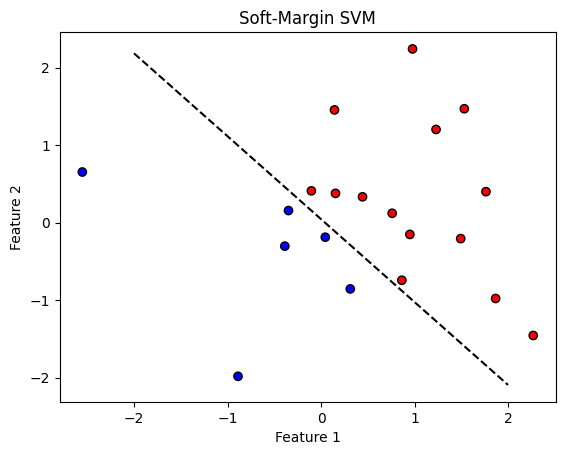

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt


np.random.seed(0)
X = np.random.randn(20, 2)
y = np.sign(X[:, 0] + X[:, 1])  


C = 1.0 
svm = SVC(kernel='linear', C=C)
svm.fit(X, y)


w = svm.coef_[0]
b = svm.intercept_[0]
x_plot = np.linspace(-2, 2, 10)
y_plot = -(w[0] * x_plot + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k--')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft-Margin SVM')
plt.show()

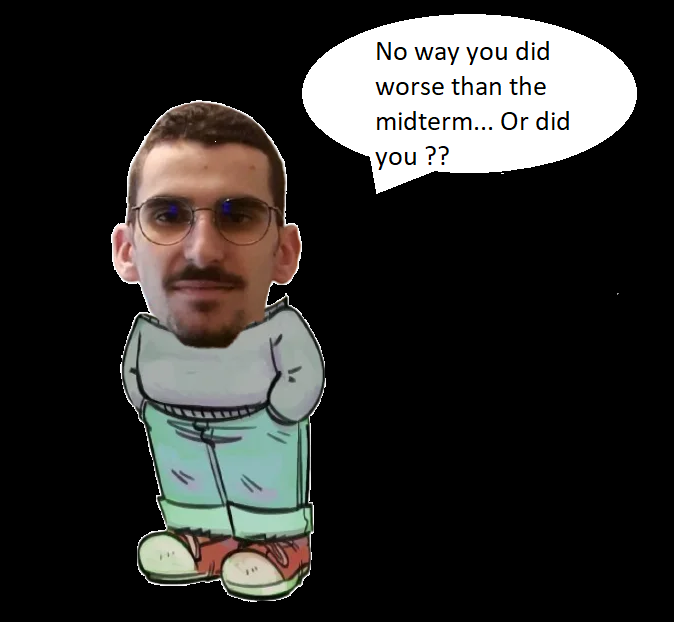